# User Profiling & Segmentation

In [1]:
import pandas as pd
import numpy as np

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

In [2]:
mydf = pd.read_csv('D:\\Desktop2\\desktop3\\Desktop2\\UserPorfilingSegmentation\\artifacts\\data_transformation\\data.csv')

In [3]:
mydf.head()

,Age,Gender,IncomeLevel,TimeSpentOnlinehrsweekday,TimeSpentOnlinehrsweekend,LikesandReactions,ClickThroughRates
0,25-34,Female,20k-40k,4.5,1.7,5640,0.193
1,65+,Male,0-20k,0.5,7.7,9501,0.114
2,45-54,Female,60k-80k,4.5,5.6,4775,0.153
3,35-44,Female,100k+,3.1,4.2,9182,0.093
4,25-34,Female,20k-40k,2.0,3.8,6848,0.175


In [5]:
mydf.IncomeLevel.value_counts()

IncomeLevel
100k+       176
40k-60k     175
60k-80k     168
80k-100k    168
20k-40k     165
0-20k       148
Name: count, dtype: int64

In [11]:
data = pd.read_csv('user_profiles_for_ads.csv')

In [13]:
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


# EXPLORATORY DATA ANALYSIS

In [15]:
data.shape

(1000, 16)

In [17]:
data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Language', 'Education Level',
       'Likes and Reactions', 'Followed Accounts', 'Device Usage',
       'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
       'Click-Through Rates (CTR)', 'Conversion Rates',
       'Ad Interaction Time (sec)', 'Income Level', 'Top Interests'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

In [23]:
data.dtypes

User ID                              int64
Age                                 object
Gender                              object
Location                            object
Language                            object
Education Level                     object
Likes and Reactions                  int64
Followed Accounts                    int64
Device Usage                        object
Time Spent Online (hrs/weekday)    float64
Time Spent Online (hrs/weekend)    float64
Click-Through Rates (CTR)          float64
Conversion Rates                   float64
Ad Interaction Time (sec)            int64
Income Level                        object
Top Interests                       object
dtype: object

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,1000.0,500.500000,288.819436,1.0,250.750,500.500,750.250,1000.00
Likes and Reactions,1000.0,4997.084000,2838.494365,101.0,2661.250,5002.500,7348.750,9973.00
Followed Accounts,1000.0,251.438000,141.941557,10.0,126.000,245.500,377.000,498.00
Time Spent Online (hrs/weekday),1000.0,2.757500,1.279735,0.5,1.700,2.800,3.800,5.00
Time Spent Online (hrs/weekend),1000.0,4.601600,2.026234,1.0,2.900,4.700,6.400,8.00
Click-Through Rates (CTR),1000.0,0.125333,0.071187,0.0,0.065,0.128,0.186,0.25
Conversion Rates,1000.0,0.049805,0.028670,0.0,0.026,0.049,0.073,0.10
Ad Interaction Time (sec),1000.0,91.425000,51.497965,5.0,45.750,90.000,137.250,179.00


In [25]:
data.isnull().sum()

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

In [27]:
data.duplicated().sum()

0

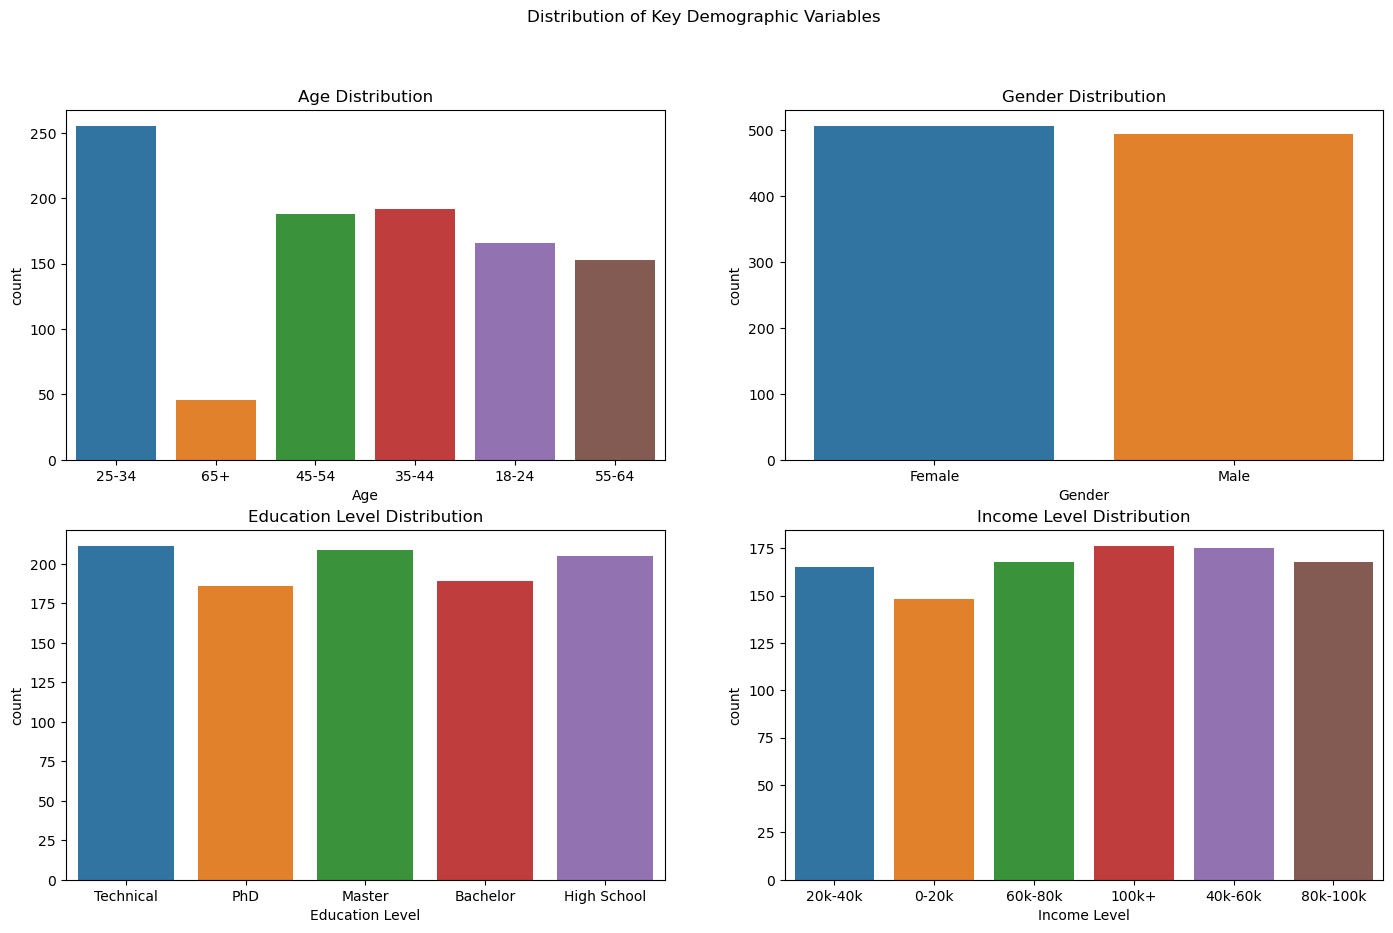

In [58]:
plt.subplots(2, 2, figsize = (17 , 10))
plt.suptitle('Distribution of Key Demographic Variables')

plt.subplot(221)
plt.title('Age Distribution')
sns.countplot(x = 'Age', data = data, )

plt.subplot(222)
plt.title('Gender Distribution')
sns.countplot(x = 'Gender', data = data)

plt.subplot(223)
plt.title('Education Level Distribution')
sns.countplot(x = 'Education Level', data = data)

plt.subplot(224)
plt.title('Income Level Distribution')
sns.countplot(x = 'Income Level', data = data)

plt.show()

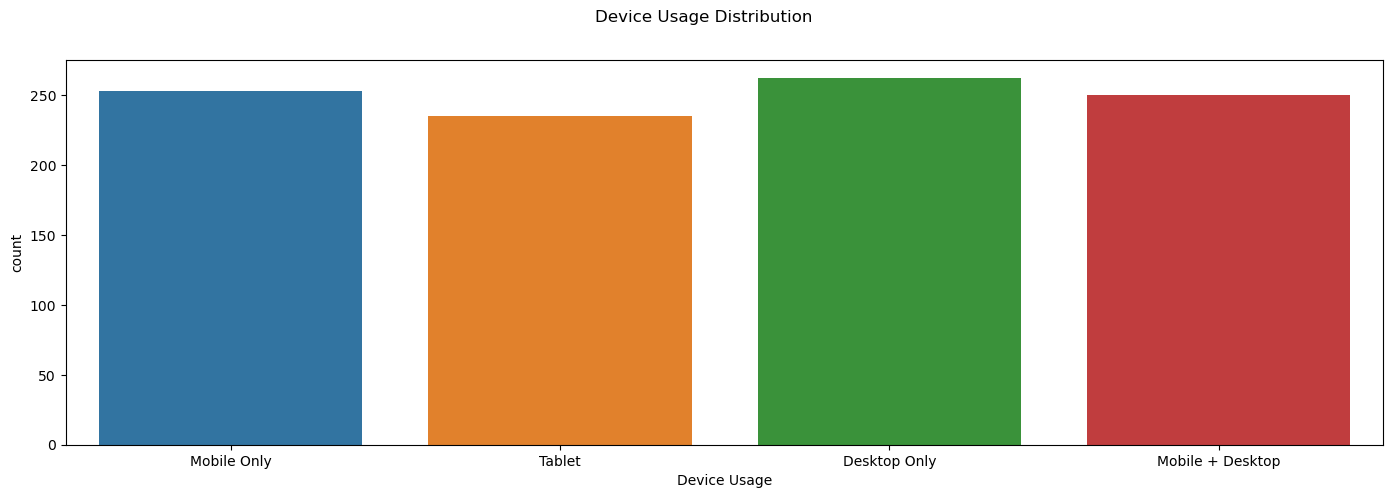

In [60]:
plt.subplots(1, 1, figsize = (17 , 5))
plt.suptitle('Device Usage Distribution')

plt.subplot(111)
sns.countplot(x = 'Device Usage', data = data)

plt.show()

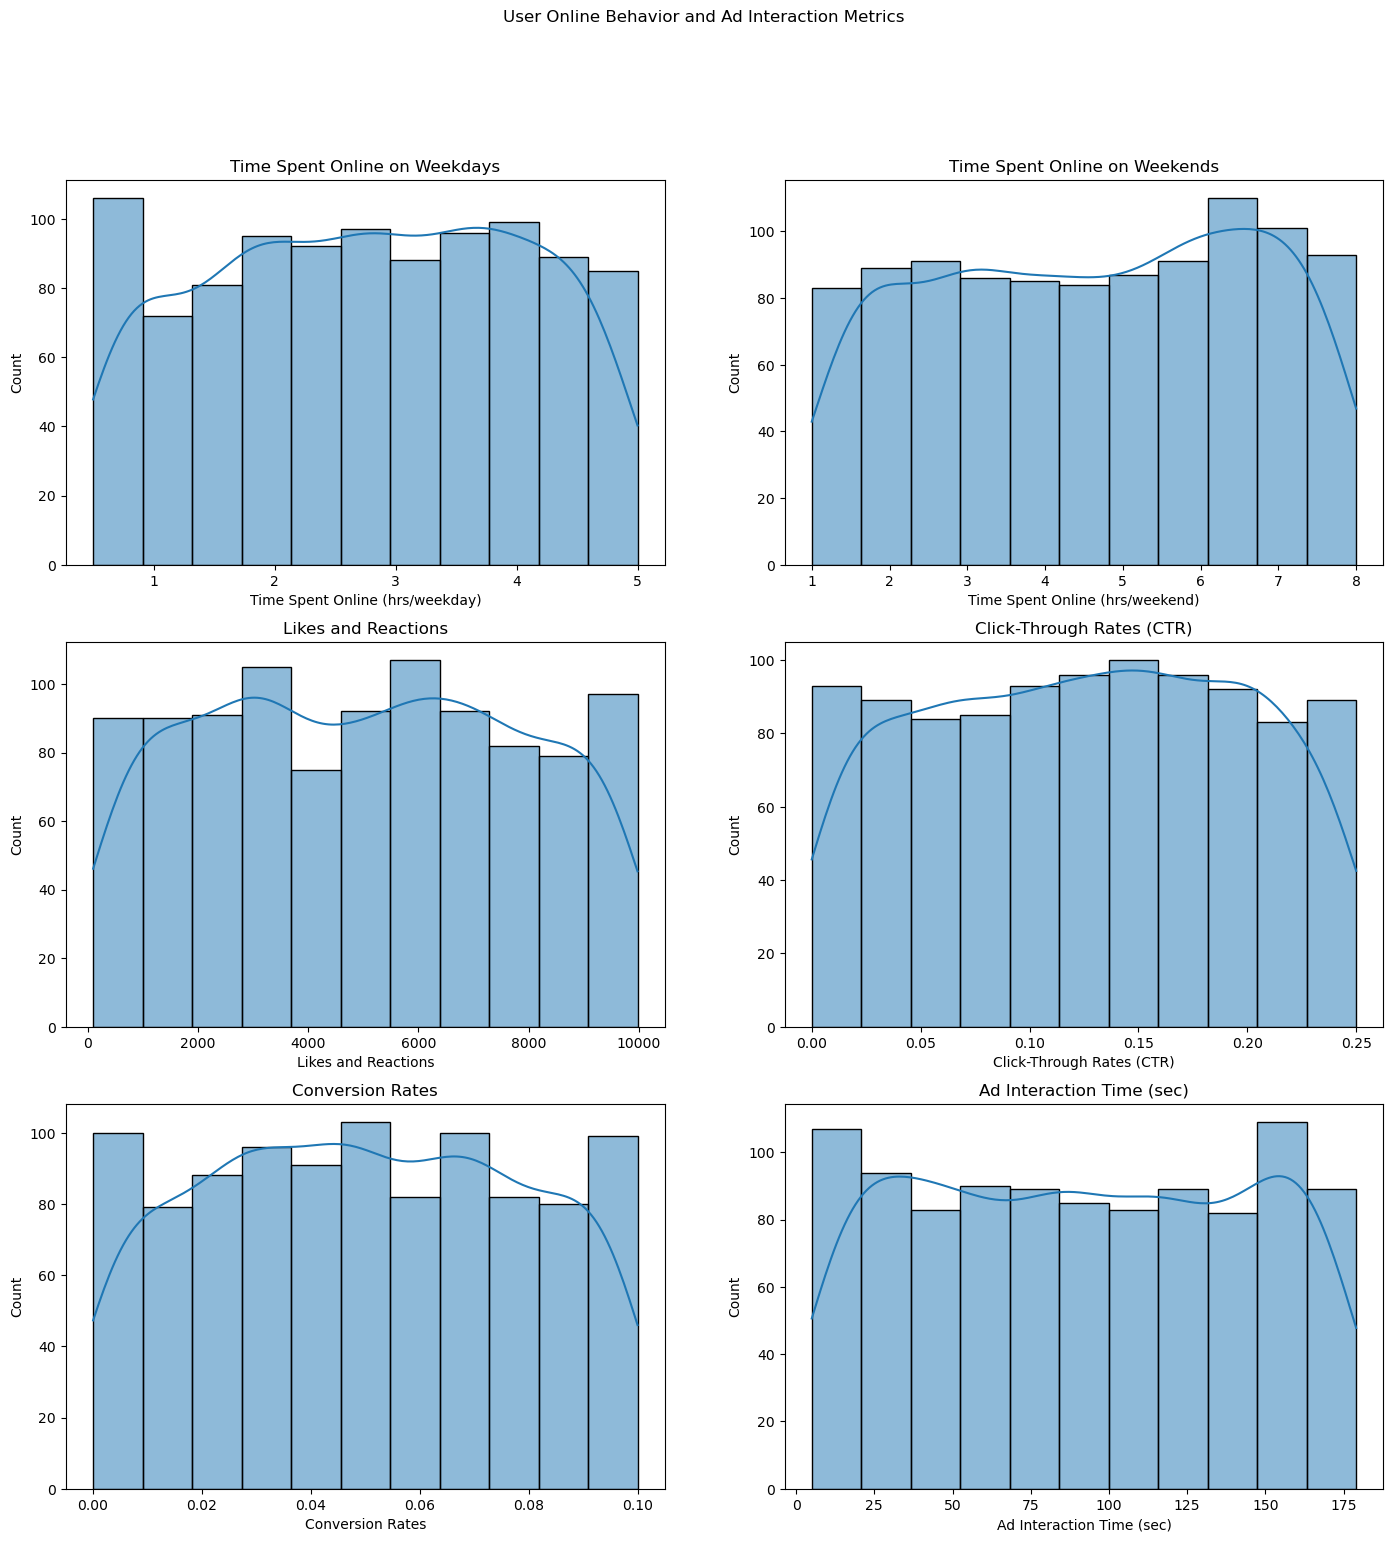

In [68]:
plt.subplots(3, 2, figsize = (17 , 17))
plt.suptitle('User Online Behavior and Ad Interaction Metrics')

plt.subplot(321)
plt.title('Time Spent Online on Weekdays')
sns.histplot(x = 'Time Spent Online (hrs/weekday)', data = data, kde=True)

plt.subplot(322)
plt.title('Time Spent Online on Weekends')
sns.histplot(x = 'Time Spent Online (hrs/weekend)', data = data, kde=True)

plt.subplot(323)
plt.title('Likes and Reactions')
sns.histplot(x = 'Likes and Reactions', data = data, kde=True)

plt.subplot(324)
plt.title('Click-Through Rates (CTR)')
sns.histplot(x = 'Click-Through Rates (CTR)', data = data, kde=True)

plt.subplot(325)
plt.title('Conversion Rates')
sns.histplot(x = 'Conversion Rates', data = data, kde=True)

plt.subplot(326)
plt.title('Ad Interaction Time (sec)')
sns.histplot(x = 'Ad Interaction Time (sec)', data = data, kde=True)

plt.show()

In [72]:
from collections import Counter

In [74]:
# splitting the 'Top Interests' column and creating a list of all interests

interests_list = data['Top Interests'].str.split(', ').sum()

In [78]:
#interests_list

In [80]:
# counting the frequency of each interest

interest_counter = Counter(interests_list)

In [94]:
#interest_counter

In [98]:
#interest_counter.items()

In [100]:
# converting the counter object to a DataFrame for easier plotting

interests_df = pd.DataFrame(interest_counter.items(), columns = ['Interest', 'Frequency']).sort_values(by = 'Frequency', ascending = False)

In [102]:
interests_df

,Interest,Frequency
0,Digital Marketing,182
5,Investing and Finance,171
7,Music Production,169
2,Fitness and Wellness,167
10,Eco-Friendly Living,163
13,Fashion Modelling,161
8,Gourmet Cooking,157
14,Reading and Literature,156
3,Gaming,155
15,Pet Care,155


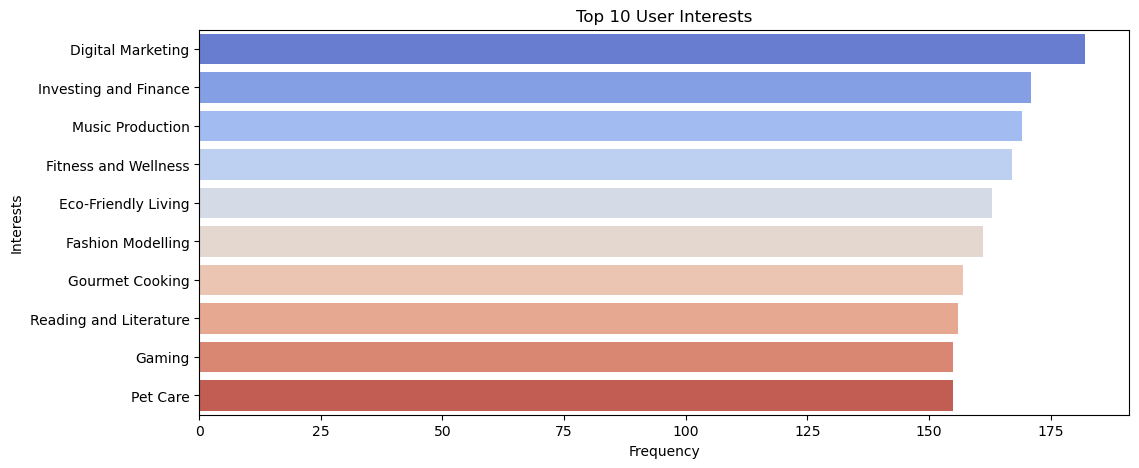

In [106]:
# plotting the most common interests

plt.figure(figsize=(12, 5))
sns.barplot(x = 'Frequency', y = 'Interest', data = interests_df.head(10), palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')
plt.ylabel('Interests')
plt.show()

# FEATURE ENGINEERING

In [109]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [111]:
# selecting features for clustering

features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

X = data[features]

In [113]:
# creating numerical and categorical pipelines

numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

numeric_transformer = StandardScaler()

categorical_features = ['Age', 'Gender', 'Income Level']

categorical_transformer = OneHotEncoder()

In [115]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                            ('cluster', KMeans(n_clusters = 5, random_state = 42))])

pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time Spent Online '
                                                   '(hrs/weekday)',
                                                   'Time Spent Online '
                                                   '(hrs/weekend)',
                                                   'Likes and Reactions',
                                                   'Click-Through Rates '
                                                   '(CTR)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Age', 'Gender',
                                                   'Income Level'])])),
                ('cluster', KMeans(n_clusters=5, random_state=42))])

In [117]:
cluster_labels = pipeline.named_steps['cluster'].labels_

In [119]:
data['Cluster'] = cluster_labels

In [129]:
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,1
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,0
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,3
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",1
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",1


In [131]:
# computing the mean values of numerical features for each cluster

cluster_means = data.groupby('Cluster')[numeric_features].mean()

In [133]:
cluster_means

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR)
Cluster,,,,
0,1.632955,6.135795,5480.022727,0.173705
1,2.937500,2.735000,7462.233333,0.152983
2,3.364532,6.151724,5997.108374,0.058502
3,3.872986,4.624171,2409.625592,0.167123
4,1.558235,3.769412,3034.235294,0.064153


In [137]:
# computing the mode values of categorical features for each cluster

for feature in categorical_features:
    mode_series = data.groupby('Cluster')[feature].agg(lambda x : x.mode()[0])
    cluster_means[feature] = mode_series

In [139]:
cluster_means

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,1.632955,6.135795,5480.022727,0.173705,25-34,Male,80k-100k
1,2.937500,2.735000,7462.233333,0.152983,25-34,Male,100k+
2,3.364532,6.151724,5997.108374,0.058502,25-34,Male,60k-80k
3,3.872986,4.624171,2409.625592,0.167123,25-34,Female,60k-80k
4,1.558235,3.769412,3034.235294,0.064153,25-34,Female,0-20k


##### Cluster 0 – “Weekend Warriors”: High weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 80k-100k.
##### Cluster 1 – “Engaged Professionals”: Balanced online activity, high likes and reactions, predominantly male, age group 25-34, high income (100k+).
##### Cluster 2 – “Low-Key Users”: Moderate to high weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 60k-80k, lower CTR.
##### Cluster 3 – “Active Explorers”: High overall online activity, lower likes and reactions, predominantly female, age group 25-34, income level 60k-80k.
##### Cluster 4 – “Budget Browsers”: Moderate online activity, lowest likes and reactions, predominantly female, age group 25-34, lowest income level (0-20k), lower CTR.

In [153]:
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,1
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,0
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,3
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",1
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",1
